In [ ]:
"""\
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python --version

In [311]:
import os
import numpy as np

# Plotting
import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [358]:
def vector2d(axis, P0, Pf, c="k", ls="-", s=1, lw=2, hw=0.05, hl=0.1, alpha=1, zorder=2):
    """
    Function to easy plot a 2D vector
    """
    quiv = axis.arrow(P0[0], P0[1], s*Pf[0], s*Pf[1], 
                      lw=lw, color=c, ls=ls,
                      head_width=hw, head_length=hl, 
                      length_includes_head=True, alpha=alpha, zorder=zorder)

class article_plotter:
    def __init__(self, figsize=(14,6), dpi=100):
        self.figsize = figsize
        self.dpi = dpi

    def plot_T_delta(self, P, hx, hy):
        P_hat = P + hx*np.imag(P) + 1j*hy*np.real(P)

        fig = plt.figure(figsize=self.figsize, dpi=self.dpi)
        ax1, ax2 = fig.subplots(1,2)

        lim = 1.9
        ax1.set_xlim([-lim,lim])
        ax1.set_ylim([-lim,lim])
        ax2.set_xlim([-lim,lim])
        ax2.set_ylim([-lim,lim])
        ax1.set_aspect("equal")
        ax2.set_aspect("equal")

        lim_ticks = 1.5
        ax1.set_xticks(np.arange(-lim_ticks, lim_ticks+0.5, 0.5))
        ax1.set_yticks(np.arange(-lim_ticks, lim_ticks+0.5, 0.5))
        ax2.set_xticks(np.arange(-lim_ticks, lim_ticks+0.5, 0.5))
        ax2.set_yticks(np.arange(-lim_ticks, lim_ticks+0.5, 0.5))
        ax1.grid(True)
        ax2.grid(True)
        # ax1.set_axis_off()
        # ax2.set_axis_off()
        ax1.set_xlabel("$\operatorname{Re}(p)$ [L]")
        ax1.set_ylabel("$\operatorname{Im}(p)$ [L]")
        ax2.set_xlabel("$\operatorname{Re}(p)$ [L]")
        ax2.set_ylabel("$\operatorname{Im}(p)$ [L]")

        lw_zero = 0.8
        ax1.axhline(0, c="k", lw=lw_zero)
        ax1.axvline(0, c="k", lw=lw_zero)
        ax2.axhline(0, c="k", lw=lw_zero)
        ax2.axvline(0, c="k", lw=lw_zero)

        # Plot p^* (dots, vectors and dashed lines)
        ax1.plot(np.real(P), np.imag(P), ".k", markersize=12)
        ax2.plot(np.real(P_hat), np.imag(P_hat), ".k", markersize=12)

        for i in range(len(P)):
            vector2d(ax1, [0,0], [np.real(P[i])*0.95, np.imag(P[i])*0.95], c="k", lw=1.5)

        ax1.plot(np.real(np.append(P,P[0])), np.imag(np.append(P,P[0])), "--k", lw=1, dashes=(10, 10))
        ax2.plot(np.real(np.append(P_hat,P_hat[0])), np.imag(np.append(P_hat,P_hat[0])), "--k", lw=1, dashes=(10, 10))

        # Affine transformation vectors
        ax2.plot(np.real(P[2]), np.imag(P[2]), ".k", markersize=12, alpha=0.5)
        vector2d(ax2, [np.real(P[2]), np.imag(P[2])], [np.real(P_hat[2]-P[2]), 0], c="r")
        vector2d(ax2, [np.real(P[2]), np.imag(P[2])], [0, np.imag(P_hat[2]-P[2])], c="b")
        ax2.text(np.real(P[2]), np.imag(P[2])-0.3, "$h_x \operatorname{Im}(p_3^*)$", fontdict={"size":20, "color":"r"})
        ax2.text(np.real(P[2])-0.85, np.imag(P[2])+0.3, "$h_y \operatorname{Re}(p_3^*)$", fontdict={"size":20, "color":"b"})

        # More text
        for i in range(len(P)):
            a, b = np.real(P[i]), np.imag(P[i])
            a_hat, b_hat = np.real(P_hat[i]), np.imag(P_hat[i])
            ax1.text(a-0.3, b-0.04+np.sign(b)*0.22, r"$p^*_{}$".format(i+1), fontdict={"size":25})
            ax2.text(a_hat-0.3, b_hat-0.04+np.sign(b_hat)*0.23, r"$T_\Delta(p^*_{})$".format(i+1), fontdict={"size":22})


        # Show the plot!!
        plt.show()

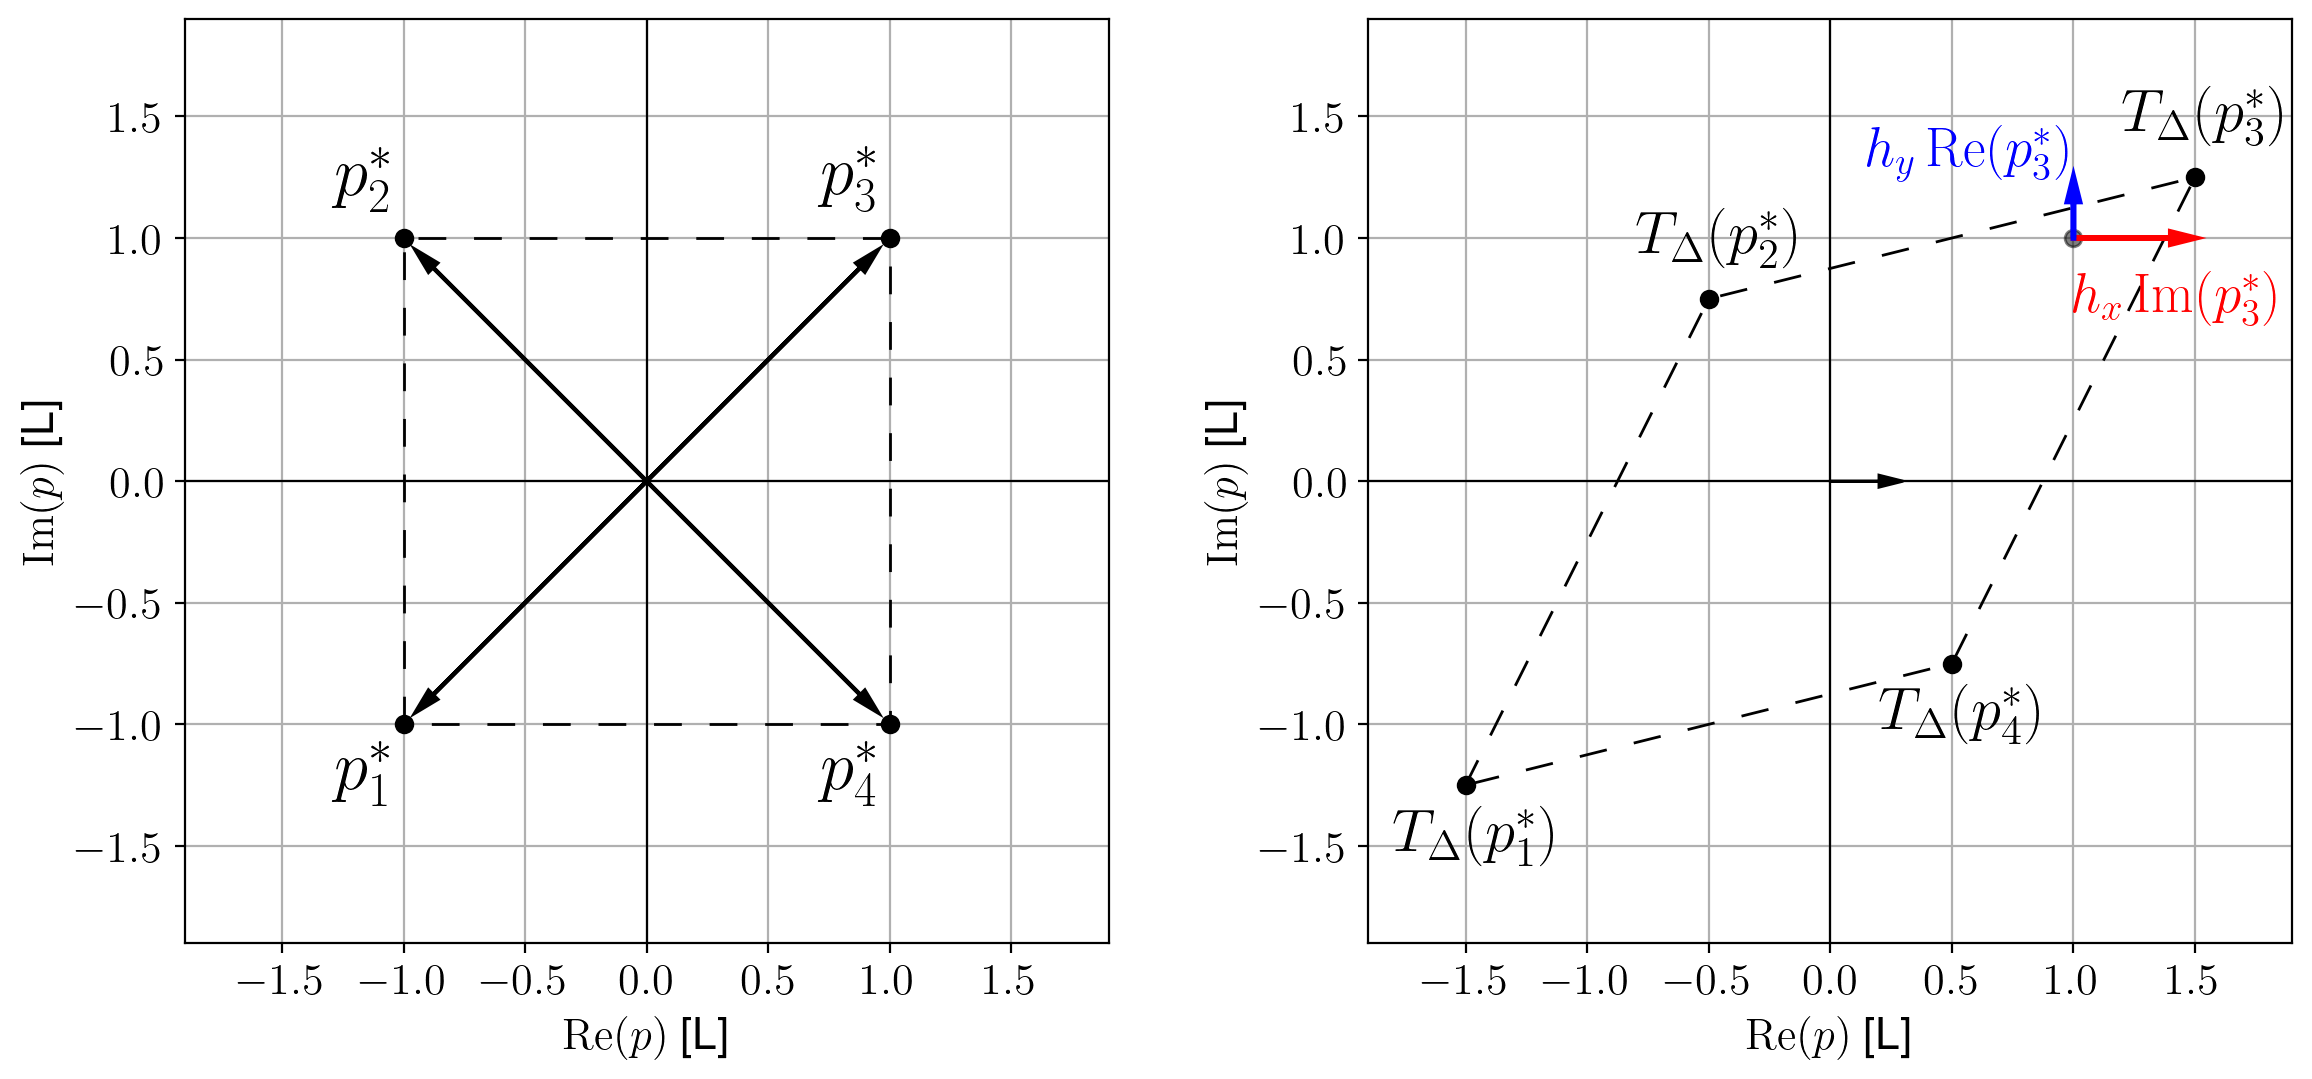

In [357]:
P = np.array([-1-1j, -1+1j, 1+1j, 1-1j])
hx, hy = 0.5,0.25

plotter = article_plotter(dpi=200)
plotter.plot_T_delta(P, hx, hy)